<a href="https://colab.research.google.com/github/vitoriaferreirap/DeepLearning/blob/main/CNN_Computer_Vision/2_Labeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verificar as anotacoes para ver se os rotulos estao corretos antes do treino.
# Visualizar cada imagem com as bounding boxes desenhadas.
# Conferir se todas tem bounding boxes, com sua classe.

In [8]:
# descompactar pasta
!unzip /content/dataset.zip -d /content/2_Labeling

Archive:  /content/dataset.zip
   creating: /content/2_Labeling/dataset/
   creating: /content/2_Labeling/dataset/images/
  inflating: /content/2_Labeling/dataset/images/1.jpg  
  inflating: /content/2_Labeling/dataset/images/10.jpg  
  inflating: /content/2_Labeling/dataset/images/2.jpg  
  inflating: /content/2_Labeling/dataset/images/3.jpg  
  inflating: /content/2_Labeling/dataset/images/4.jpg  
  inflating: /content/2_Labeling/dataset/images/5.jpg  
  inflating: /content/2_Labeling/dataset/images/6.jpg  
  inflating: /content/2_Labeling/dataset/images/7.jpg  
  inflating: /content/2_Labeling/dataset/images/8.jpg  
  inflating: /content/2_Labeling/dataset/images/9.jpg  
   creating: /content/2_Labeling/dataset/label/
  inflating: /content/2_Labeling/dataset/label/1.txt  
  inflating: /content/2_Labeling/dataset/label/10.txt  
  inflating: /content/2_Labeling/dataset/label/2.txt  
  inflating: /content/2_Labeling/dataset/label/3.txt  
  inflating: /content/2_Labeling/dataset/label/4

In [9]:
# O '!' diz ao Colab para executar um comando de sistema
# YOLO
!pip install ultralytics

In [12]:
import os # manipula caminhos de pastas
import matplotlib.pyplot as plt # desenha as imagens e boxes
import matplotlib.patches as patches # cria retângulos (bounding boxes)
from PIL import Image # abri imagens


In [13]:
# Caminho da pasta do dataset
dataset_path = "/content/2_Labeling/dataset" # Ajuste conforme sua pasta real
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "label")

In [14]:
# leitura pasta imagens
lista_imagens = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png'))]

In [15]:
# O YOLO entende que o ID 0 nos seus arquivos .txt é "parado".
# pode ter uma ou mais classes
categories = ["parado"]

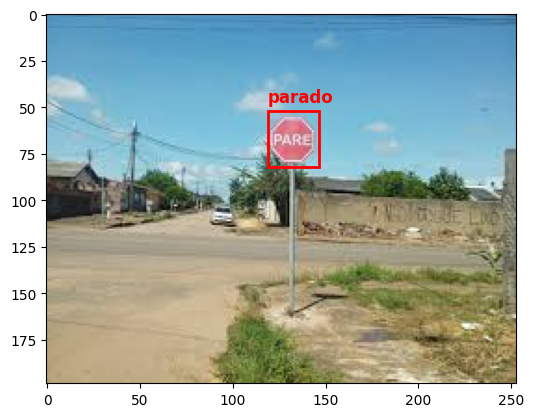

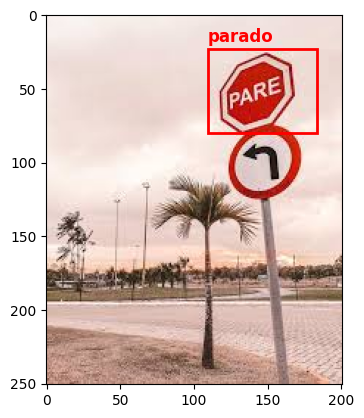

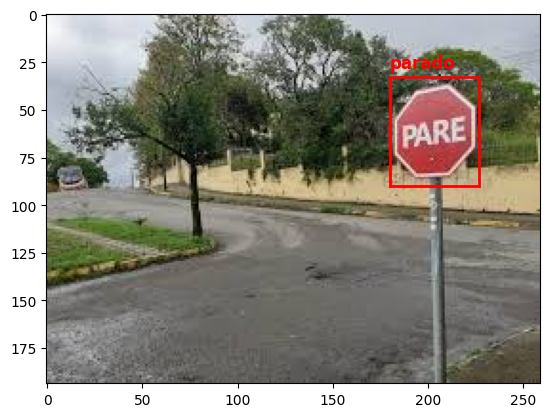

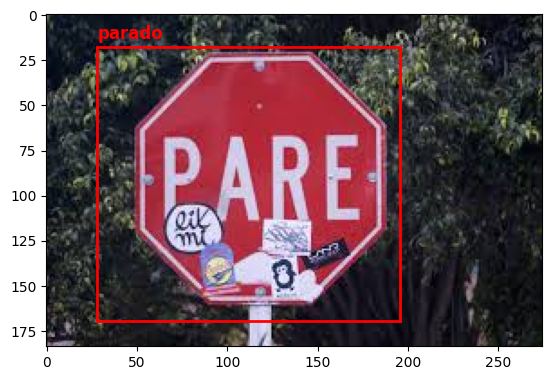

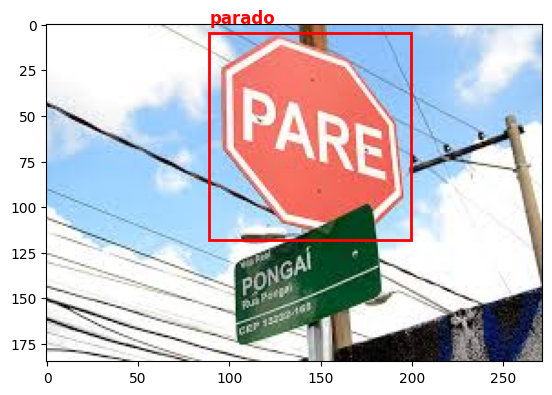

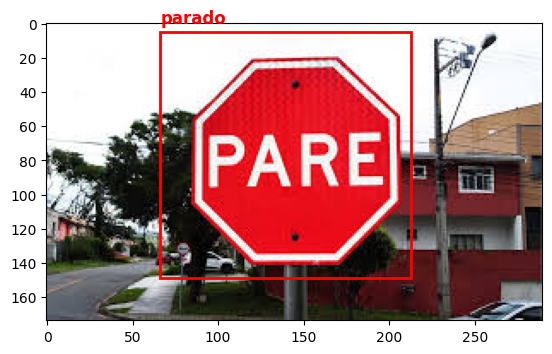

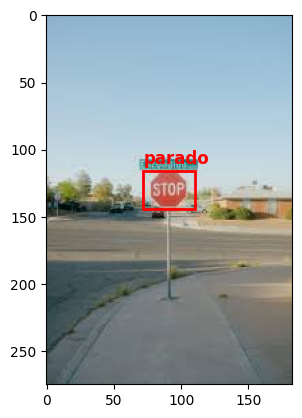

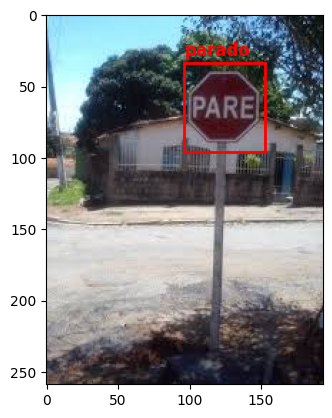

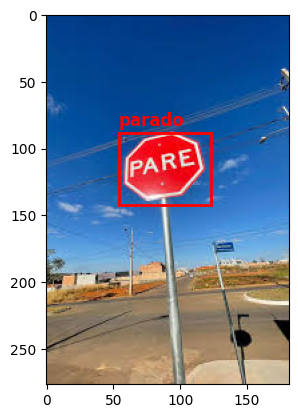

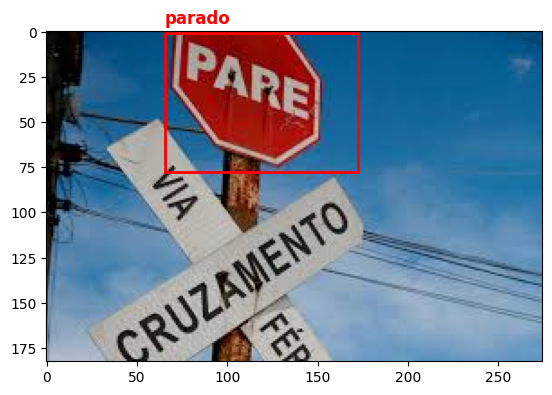

In [16]:
for file_name in lista_imagens:
    image_path = os.path.join(images_path, file_name)

    # O arquivo de texto tem o mesmo nome da imagem, mas termina em .txt
    label_path = os.path.join(labels_path, os.path.splitext(file_name)[0] + ".txt")

    # Abre a imagem
    img = Image.open(image_path)
    img_w, img_h = img.size # Precisamos do tamanho para converter as coordenadas

    # Cria o gráfico
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Se existir o arquivo de anotação, lemos as linhas dele
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            lines = f.readlines()

            for line in lines:
                # YOLO: class_id x_center y_center width height (tudo entre 0 e 1)
                parts = line.split()
                class_id = int(parts[0])
                x_center, y_center, w, h = map(float, parts[1:])

                # CONVERSÃO: YOLO (0-1) para Pixels (Matplotlib)
                # x_center e y_center no YOLO são o meio da caixa
                real_w = w * img_w
                real_h = h * img_h
                real_x = (x_center * img_w) - (real_w / 2)
                real_y = (y_center * img_h) - (real_h / 2)

                # Cria o retângulo
                rect = patches.Rectangle(
                    (real_x, real_y), real_w, real_h, linewidth=2, edgecolor='r', facecolor='none'
                )
                ax.add_patch(rect)

                # Escreve o nome da classe
                category_name = categories[class_id]
                ax.text(real_x, real_y-5, category_name, color='red', fontsize=12, weight='bold')

    plt.show()

    # Para teste, mostra só uma imagem (descomente o break abaixo)
    #break

In [ ]:
# Detecçao
# Lida com uma ou várias classes dentro de uma só imagem.

In [ ]:
# Classificacao
# Lida com apenas uma classe por imagem.

In [ ]:
# Segmentacao semantica